In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

## SME - Homodyne detection

10.0%. Run time:   7.80s. Est. time left: 00:00:01:10
20.0%. Run time:  14.95s. Est. time left: 00:00:00:59
30.0%. Run time:  22.61s. Est. time left: 00:00:00:52
40.0%. Run time:  31.44s. Est. time left: 00:00:00:47
50.0%. Run time:  40.39s. Est. time left: 00:00:00:40
60.0%. Run time:  48.95s. Est. time left: 00:00:00:32
70.0%. Run time:  57.75s. Est. time left: 00:00:00:24
80.0%. Run time:  65.83s. Est. time left: 00:00:00:16
90.0%. Run time:  74.00s. Est. time left: 00:00:00:08
100.0%. Run time:  81.79s. Est. time left: 00:00:00:00
Total run time:  81.95s


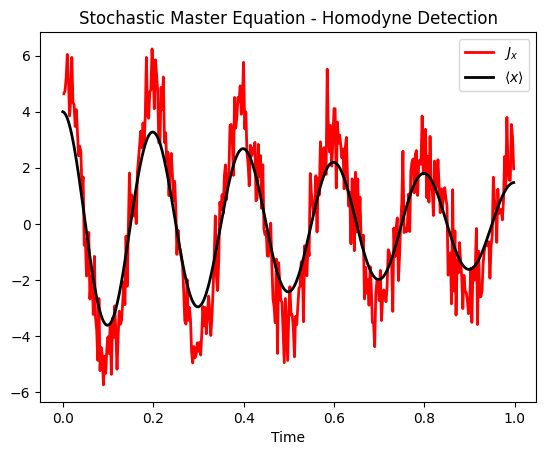

In [ ]:
# parameters
DIM = 20               # Hilbert space dimension
DELTA = 5 * 2 * np.pi  # cavity detuning
KAPPA = 2              # cavity decay rate
INTENSITY = 4          # intensity of initial state
NUMBER_OF_TRAJECTORIES = 500 # number of trajectories

# operators
a = destroy(DIM) # annihilation operator
x = a + a.dag() # position operator
H = DELTA * a.dag() * a # Hamiltonian

rho_0 = coherent(DIM, np.sqrt(INTENSITY)) # initial state
times = np.arange(0, 1, 0.0025) # time vector

# solve the master equation using the stochastic master equation with homodyne detection
stoc_solution = smesolve(
    H, rho_0, times,
    c_ops=[],
    sc_ops=[np.sqrt(KAPPA) * a],
    e_ops=[x],
    ntraj=NUMBER_OF_TRAJECTORIES,
    options={"dt": 0.00125, "store_measurement": True,}
)

fig, ax = plt.subplots()
ax.set_title('Stochastic Master Equation - Homodyne Detection')
ax.plot(times[1:], np.array(stoc_solution.measurement).mean(axis=0)[0, :].real,
        'r', lw=2, label=r'$J_x$')
ax.plot(times, stoc_solution.expect[0], 'k', lw=2,
        label=r'$\langle x \rangle$')
ax.set_xlabel('Time')
ax.legend()

In [ ]:
print(stoc_solution.measurement[0].shape)
#Wtf

(1, 399)


In [33]:
print(stoc_solution.measurement[0])

[[ 6.89822170e+00  1.76534218e+01  1.26851929e+01 -1.00296804e+01
   2.43121541e+01  2.84969975e+01  9.47452584e+00  2.83043193e+00
   4.50175727e+00  2.14385751e+01 -9.19272530e-01  1.91628026e+00
  -7.83770360e+00  1.13797835e+00  7.60990095e+00 -3.00179420e+00
   1.24786875e+01  8.11204697e+00 -2.72490454e+01 -2.89210907e+01
  -4.28030174e+00  2.03822017e+01  5.83096082e+00  1.38023614e+01
  -3.98229237e+01  3.55824970e+00  4.56471563e+00  9.02911692e+00
   4.40642289e+00  3.38322113e+01  2.64736269e+00  1.60383470e+01
  -2.61059781e+01  3.09160664e+01 -3.50394435e+01  3.78310771e-01
  -2.39527879e+01  1.27701789e+01  1.41426960e+01 -1.60308843e+01
  -1.81727943e+01 -2.83499895e+01  3.27407043e+01 -1.57021321e+01
   1.56021077e+01 -1.36669940e+01  3.53220016e+01  2.66464127e+01
   7.30121699e+00 -9.52558650e+00 -4.40166667e-01 -2.37951967e+01
   3.30274261e+01  2.77311647e+01  4.87937456e+01  3.56902184e+01
  -2.86101246e+01 -1.59711380e+01  9.83496507e+00 -5.22537140e+00
   1.90891

In [35]:
# Create a stochastic solver instance with the some Hamiltonian as the
# previous evolution.

solver = SMESolver(
    H, 
    heterodyne=False,
    sc_ops=[np.sqrt(KAPPA) * a],
    options={"dt": 0.00125, "store_measurement": True,}
)

# Run the evolution, noise
recreated_solution = solver.run_from_experiment(
    rho_0, #stoc_solution.measurement[0],
    e_ops=[H],
    # The third parameter is the measurement, not the Wiener increment
    measurement=True,
    noise=True,
)

TypeError: StochasticSolver.run_from_experiment() missing 1 required positional argument: 'tlist'